In [1]:
# import des librairies requises
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from stop_words import get_stop_words
import unidecode
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Marine\\Documents\\E4\\Projet-Leboncoin\\moderation\\notebooks\\stop_words\\stop-words\\languages.json'

In [3]:
# lecture des différents csv dans les 3 variables 
#df1 = pd.read_csv("./../data/offers.csv")
df1 = pd.read_csv("./../data/offers_with_10k_each_contracts.csv")

In [4]:
df_offers = df1[df1.industry_id.notnull()]

In [5]:
# Comptage de nombres d'offres pour chaque type d'entreprise
df1.industry_id.value_counts()

5.0     7854
9.0     3374
16.0    3040
15.0    2767
20.0    2629
10.0    2070
6.0     1931
17.0    1502
19.0    1118
22.0    1078
8.0     1018
7.0      915
24.0     879
1.0      862
21.0     860
12.0     853
13.0     849
2.0      792
23.0     773
14.0     763
4.0      729
18.0     660
11.0     589
3.0      566
Name: industry_id, dtype: int64

In [6]:
# Remplacement des valeurs NA avec ""

df_offers['description'] = [BeautifulSoup(text, "html.parser").get_text() for text in df_offers['description'].fillna("")]

C:\Users\Antoine\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#Définition du préprocessor pour supprimer les digits et transformer le texte en minuscule
def my_preprocessor(text):
    return unidecode.unidecode(''.join([letter for letter in text if not letter.isdigit()]).strip().lower())

In [8]:
# Vectorisation

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer


#stop words fr dans stop_words
stop_wordsFR = get_stop_words('french')

vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    analyzer="word",
    binary=False,
    max_features=6000,
    stop_words = stop_wordsFR,
preprocessor=my_preprocessor)

In [9]:
#tfidf fit de cleaned_description

vectorizer.fit(df_offers.description)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=6000, min_df=1,
        ngram_range=(1, 3), norm='l2',
        preprocessor=<function my_preprocessor at 0x09DFF8E8>,
        smooth_idf=True,
        stop_words=['a', 'ai', 'aie', 'aient', 'aies', 'ait', 'alors', 'as', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'aux', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', '...ça', 'étaient', 'étais', 'était', 'étant', 'état', 'étiez', 'étions', 'été', 'étés', 'êtes', 'être'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [10]:
X = vectorizer.transform(df_offers.description)
X

<38471x6000 sparse matrix of type '<class 'numpy.float64'>'
	with 4242064 stored elements in Compressed Sparse Row format>

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, df_offers.industry_id, test_size=0.30)

In [15]:
clf = LogisticRegression()

In [16]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
clf.predict(X_test)

array([10., 21., 20., ..., 16., 16., 20.])

In [21]:
Counter(clf.predict(X_test))

Counter({10.0: 868,
         21.0: 99,
         20.0: 1135,
         16.0: 1158,
         9.0: 1398,
         24.0: 101,
         5.0: 3031,
         7.0: 47,
         15.0: 1444,
         6.0: 522,
         8.0: 198,
         17.0: 446,
         19.0: 167,
         23.0: 136,
         22.0: 247,
         12.0: 102,
         13.0: 99,
         1.0: 46,
         14.0: 89,
         4.0: 73,
         3.0: 11,
         2.0: 62,
         18.0: 41,
         11.0: 22})

In [23]:
Counter(y_test)

Counter({9.0: 1015,
         21.0: 273,
         16.0: 895,
         4.0: 222,
         24.0: 276,
         2.0: 237,
         5.0: 2385,
         10.0: 626,
         6.0: 557,
         1.0: 224,
         7.0: 291,
         20.0: 805,
         15.0: 840,
         14.0: 227,
         17.0: 454,
         22.0: 319,
         12.0: 273,
         23.0: 231,
         18.0: 188,
         3.0: 176,
         13.0: 236,
         8.0: 288,
         19.0: 331,
         11.0: 173})

In [27]:
#Score de la prédiction
accuracy_score(clf.predict(X_test), y_test)

0.4970542367007451

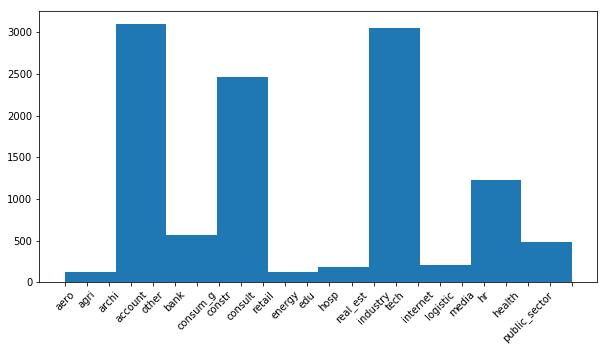

In [63]:
plt.hist(clf.predict(X_test))
#plt.xticks(range(1, 6))
#plt.rcParams['figure.figsize'] = [10, 5]
plt.xticks(np.arange(1,25), ('aero', 'agri', 'archi', 'account', 'other', 'bank', 'consum_g', 'constr', 'consult', 'retail','energy',
                            'edu', 'hosp', 'real_est', 'industry', 'tech', 'internet', 'logistic', 'media', 'hr', 'health', 'public_sector'), rotation=45 )
plt.show()